# Statistics

## Import module

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os 
import glob

import math
import scipy.signal as signal
from scipy.stats import levene, shapiro, ttest_ind, f_oneway, mannwhitneyu

In [2]:
df_all = pd.read_csv(r'D:\BOIL\ChihTing\-NIRS-pediatrics\Data\behavior_case.csv')
df_all.head()

,Group,Name,valid_cue_react,invalid_cue_react,no_cue_react,anticipation,orientation,omission
0,ADHD,陳楷欣,842.55,810.45,887.03,2.0,3.0,1.0
1,ADHD,蕭東楷,500.00,503.98,770.08,3.0,1.0,0.0
2,ADHD,戴佳萱,672.52,711.75,880.32,0.0,0.0,0.0
3,ADHD,蕭東宣,326.70,406.03,569.78,76.0,4.0,0.0
4,ADHD,楊家庠,689.50,737.58,765.63,0.0,0.0,0.0


In [3]:
df_m = pd.melt(df_all, id_vars=['Group', 'Name'], var_name='type', value_name='value')
df_m = df_m[df_m['type'] .isin(['valid_cue_react', 'invalid_cue_react', 'no_cue_react'])]

<AxesSubplot:xlabel='type', ylabel='value'>

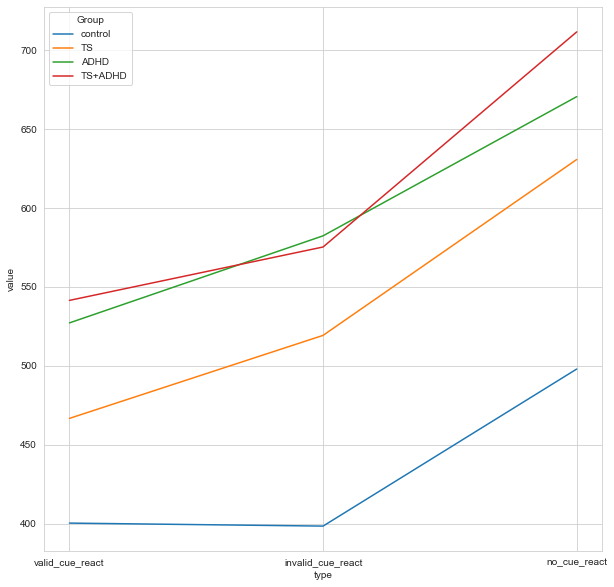

In [37]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10, 10))
sns.lineplot(data=df_m, x='type', y='value', hue='Group', hue_order=['control', 'TS', 'ADHD', 'TS+ADHD'], ci=None)

Text(0.5, 1.0, 'Reaction times in each stage')

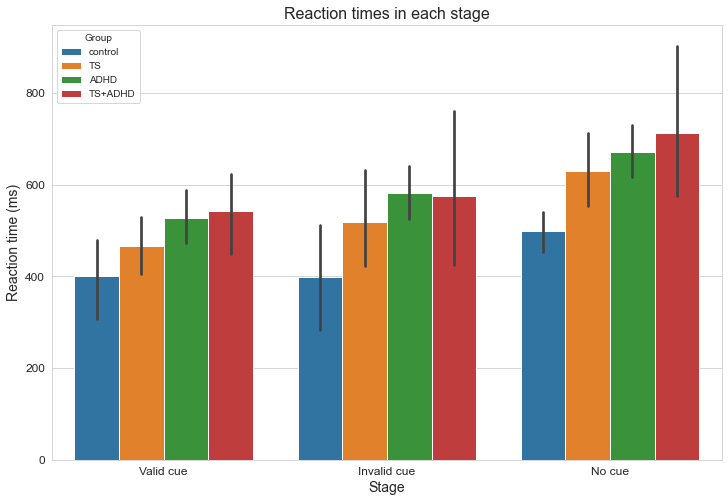

In [6]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(data=df_m, x='type', y='value',  hue='Group', hue_order=['control', 'TS', 'ADHD', 'TS+ADHD'])
plt.xlabel('Stage', fontsize=14)
plt.ylabel('Reaction time (ms)', fontsize=14)
plt.xticks([0, 1, 2], ['Valid cue', 'Invalid cue', 'No cue'], fontsize=12)
plt.yticks(fontsize=12)
plt.title('Reaction times in each stage', fontsize=16)

In [8]:
df_m = pd.melt(df_all, id_vars=['Group', 'Name'], var_name='type', value_name='value')
df_m = df_m[df_m['type'] .isin(['anticipation', 'orientation','omission'])]

Text(0.5, 1.0, 'Times in each error')

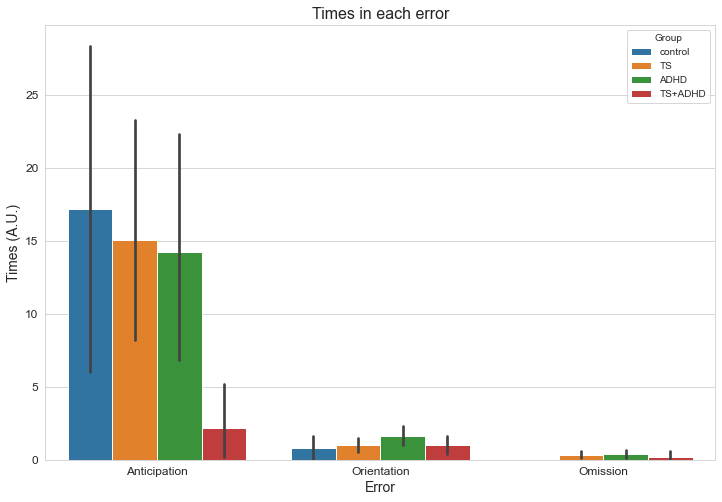

In [9]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(data=df_m, x='type', y='value',  hue='Group', hue_order=['control', 'TS', 'ADHD', 'TS+ADHD'])
plt.xlabel('Error', fontsize=14)
plt.ylabel('Times (A.U.)', fontsize=14)
plt.xticks([0, 1, 2], ['Anticipation', 'Orientation', 'Omission'], fontsize=12)
plt.yticks(fontsize=12)
plt.title('Times in each error', fontsize=16)

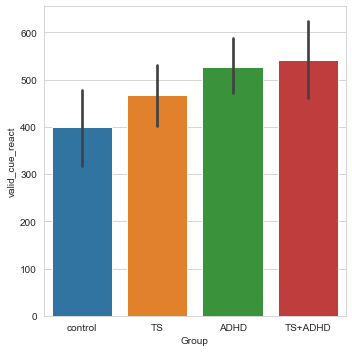

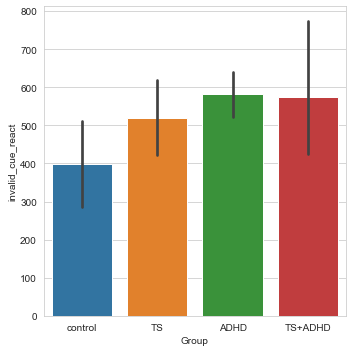

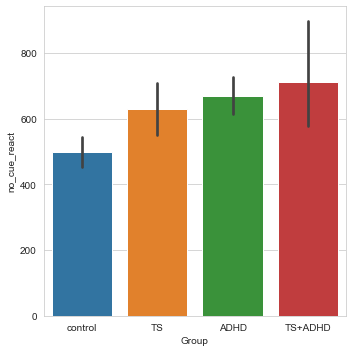

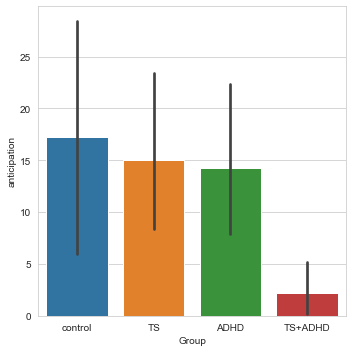

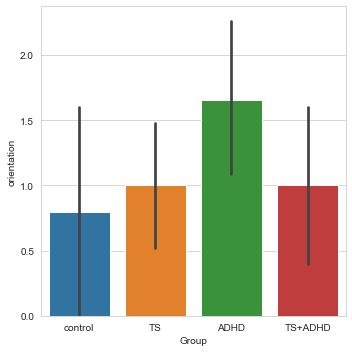

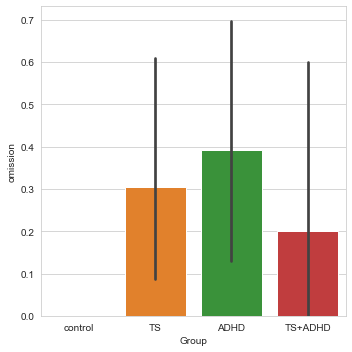

In [15]:
for col in df_all.drop(columns=['Group', 'Name']).columns:
    sns.set_style('whitegrid')
    fig, ax = plt.subplots(figsize=(5, 5))
    sns.barplot(data=df_all, x='Group', y=str(col), order=['control', 'TS', 'ADHD', 'TS+ADHD'])
    # sns.barplot(ax=ax[1], data=df_all, x='Group', y=str(col))
    # plt.suptitle('case' + str(i))
    plt.tight_layout()
    plt.show()

In [2]:
df_act = pd.read_csv(r'D:\BOIL\ChihTing\-NIRS-pediatrics\Data\activation.csv')

In [4]:
df_act

,stage0_CH2_Oxy_activation,stage0_CH2_Deoxy_activation,stage0_CH3_Oxy_activation,stage0_CH3_Deoxy_activation,stage0_CH2_HbT_activation,stage0_CH3_HbT_activation,stage1_CH2_Oxy_activation,stage1_CH2_Deoxy_activation,stage1_CH3_Oxy_activation,stage1_CH3_Deoxy_activation,...,stage5_CH3_Deoxy_activation,stage5_CH2_HbT_activation,stage5_CH3_HbT_activation,stage6_CH2_Oxy_activation,stage6_CH2_Deoxy_activation,stage6_CH3_Oxy_activation,stage6_CH3_Deoxy_activation,stage6_CH2_HbT_activation,stage6_CH3_HbT_activation,group
0,0.281914,0.455166,0.500908,0.328847,0.443847,0.342558,0.385296,0.389378,0.422146,0.509699,...,0.825258,0.658398,0.547664,0.733944,0.742382,0.695968,0.634490,0.559638,0.786116,ADHD
1,0.797689,0.720738,0.823779,0.815334,0.620881,0.254422,0.597805,0.521874,0.761742,0.347956,...,0.476167,0.529744,0.573048,0.752889,0.633976,0.401535,0.481485,0.642801,0.522495,ADHD
2,0.303917,0.246170,0.422167,0.197737,0.406791,0.548411,0.510645,0.391303,0.799682,0.445661,...,0.373823,0.436810,0.478896,0.550182,0.497351,0.619390,0.560324,0.540404,0.750144,ADHD
3,0.399889,0.355377,0.503284,0.456172,0.603591,0.325926,0.792689,0.372877,0.965251,0.933365,...,0.355560,1.109652,0.801667,0.904283,0.535440,0.351076,0.526419,1.247660,0.570428,ADHD
4,0.390378,0.442202,0.555528,0.338836,0.586602,0.445850,0.451196,0.454404,0.516870,0.421160,...,0.490159,0.971980,0.807284,0.691102,0.876945,0.580513,0.607840,1.347317,0.688350,ADHD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,1.000000,1.000000,0.418616,0.526524,1.376910,0.753328,0.655689,0.278071,0.672222,0.496801,...,0.648475,0.607807,0.308751,0.797493,0.385044,0.572123,0.423439,1.090321,0.791810,TS+ADHD
60,0.489217,1.000000,0.625846,0.780760,1.158575,1.041593,0.384155,0.295867,0.360200,0.317438,...,0.379446,0.306182,0.390068,0.541570,0.547280,0.572504,0.830023,1.010257,1.355705,TS+ADHD
61,0.682699,0.564322,0.628917,0.455074,0.909747,0.935909,0.636310,0.407180,0.762062,0.597292,...,0.582810,0.613397,0.774607,0.629472,0.331830,0.413656,0.453556,0.795917,0.621160,TS+ADHD
62,0.638168,0.698687,0.285301,0.343058,0.369126,0.336979,0.613760,0.510929,0.821918,0.641064,...,0.466248,0.607841,0.387701,0.532413,0.772136,0.407318,0.240414,0.918493,0.477775,TS+ADHD


In [3]:
stage=[1, 3, 5]
oxy=['Oxy']
df_act_2 = pd.DataFrame()
df_act_3 = pd.DataFrame()

for s in stage:
    for o in oxy:
        df_act_2['group'] = df_act['group']
        df_act_2['CH'] = 'CH2'
        df_act_2['stage'+str(s)+'_'+str(o)+'_activation'] = df_act['stage'+str(s)+'_CH2_'+str(o)+'_activation']
df_act_2

for s in stage:
    for o in oxy:
        df_act_3['group'] = df_act['group']
        df_act_3['CH'] = 'CH3'
        df_act_3['stage'+str(s)+'_'+str(o)+'_activation'] = df_act['stage'+str(s)+'_CH3_'+str(o)+'_activation']
df_act_3

df_act_all = pd.concat([df_act_2, df_act_3], axis=0)
df_act_all

,group,CH,stage1_Oxy_activation,stage3_Oxy_activation,stage5_Oxy_activation
0,ADHD,CH2,0.385296,0.940430,0.681965
1,ADHD,CH2,0.597805,0.641420,0.597113
2,ADHD,CH2,0.510645,0.487625,0.308526
3,ADHD,CH2,0.792689,0.618373,0.887674
4,ADHD,CH2,0.451196,0.491351,0.588746
...,...,...,...,...,...
59,TS+ADHD,CH3,0.672222,0.686304,0.602810
60,TS+ADHD,CH3,0.360200,0.348982,0.293384
61,TS+ADHD,CH3,0.762062,0.388490,0.382729
62,TS+ADHD,CH3,0.821918,0.836443,0.653971


In [4]:
df_melt = pd.melt(df_act_all, id_vars=['group', 'CH'], var_name='stage', value_name='value')
df_melt


,group,CH,stage,value
0,ADHD,CH2,stage1_Oxy_activation,0.385296
1,ADHD,CH2,stage1_Oxy_activation,0.597805
2,ADHD,CH2,stage1_Oxy_activation,0.510645
3,ADHD,CH2,stage1_Oxy_activation,0.792689
4,ADHD,CH2,stage1_Oxy_activation,0.451196
...,...,...,...,...
379,TS+ADHD,CH3,stage5_Oxy_activation,0.602810
380,TS+ADHD,CH3,stage5_Oxy_activation,0.293384
381,TS+ADHD,CH3,stage5_Oxy_activation,0.382729
382,TS+ADHD,CH3,stage5_Oxy_activation,0.653971


In [80]:
def julian(x):
    mean_value = round(x.mean(), 3)
    std_value = round(x.std(), 3)

    return str(mean_value) + "±" + str(std_value)

In [7]:
df_melt.groupby(['stage', 'group', 'CH']).agg(julian)

NameError: name 'df_melt' is not defined

(array([0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

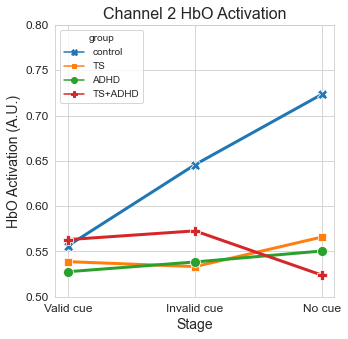

In [5]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(5, 5))
sns.lineplot(data=df_melt[df_melt['CH']=='CH2'], x='stage', y='value', hue='group', style='group', dashes=False, markers=True, linewidth=3, ci=None, markersize=10, hue_order=['control', 'TS', 'ADHD', 'TS+ADHD'])
plt.xlabel('Stage', fontsize=14)
plt.ylabel('HbO Activation (A.U.)', fontsize=14)
plt.title('Channel 2 HbO Activation', fontsize=16)
plt.ylim([0.5, 0.8])
plt.xticks([0, 1, 2], ['Valid cue', 'Invalid cue', 'No cue'], fontsize=12)
plt.yticks(fontsize=12)

(array([0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

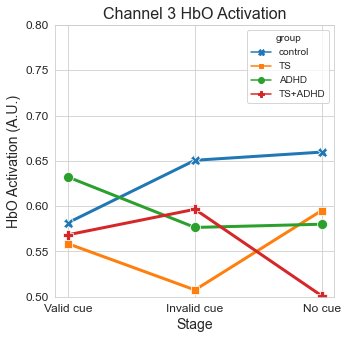

In [6]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.lineplot(data=df_melt[df_melt['CH']=='CH3'], x='stage', y='value', hue='group', style='group', dashes=False, markers=True, linewidth=3, ci=None, markersize=10, hue_order=['control', 'TS', 'ADHD', 'TS+ADHD'])
plt.xlabel('Stage', fontsize=14)
plt.ylabel('HbO Activation (A.U.)', fontsize=14)
plt.title('Channel 3 HbO Activation', fontsize=16)
plt.ylim([0.5, 0.8])
plt.xticks([0, 1, 2], ['Valid cue', 'Invalid cue', 'No cue'], fontsize=12)
plt.yticks(fontsize=12)

(array([0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

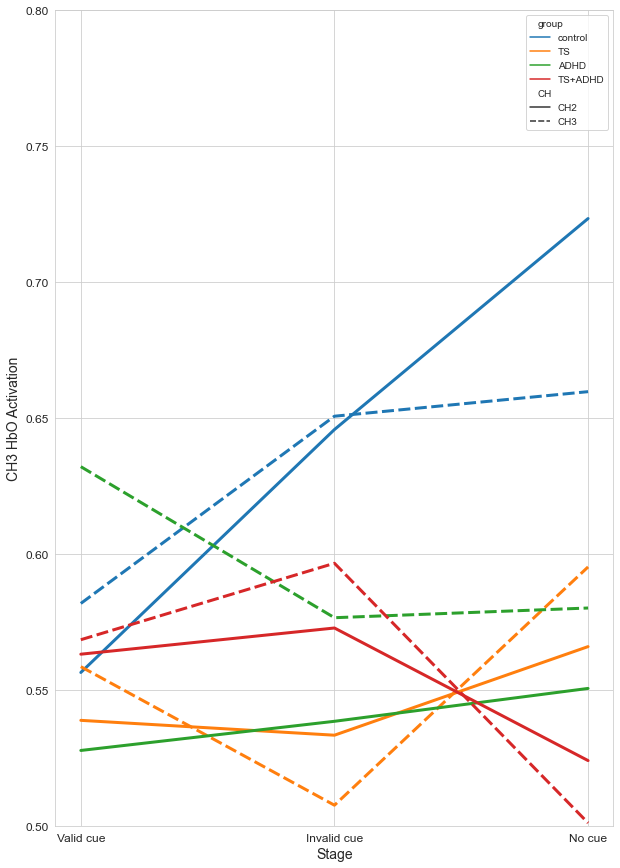

In [13]:
fig, ax = plt.subplots(figsize=(10, 15))
sns.lineplot(data=df_melt, x='stage', y='value', hue='group', ci=None, linewidth=3,hue_order=['control', 'TS', 'ADHD', 'TS+ADHD'], style='CH')
plt.xlabel('Stage', fontsize=14)
plt.ylabel('CH3 HbO Activation', fontsize=14)
plt.ylim([0.5, 0.8])
plt.xticks([0, 1, 2], ['Valid cue', 'Invalid cue', 'No cue'], fontsize=12)
plt.yticks(fontsize=12)

In [94]:
df_act

,stage0_CH2_Oxy_activation,stage0_CH2_Deoxy_activation,stage0_CH3_Oxy_activation,stage0_CH3_Deoxy_activation,stage0_CH2_HbT_activation,stage0_CH3_HbT_activation,stage1_CH2_Oxy_activation,stage1_CH2_Deoxy_activation,stage1_CH3_Oxy_activation,stage1_CH3_Deoxy_activation,...,stage5_CH3_Deoxy_activation,stage5_CH2_HbT_activation,stage5_CH3_HbT_activation,stage6_CH2_Oxy_activation,stage6_CH2_Deoxy_activation,stage6_CH3_Oxy_activation,stage6_CH3_Deoxy_activation,stage6_CH2_HbT_activation,stage6_CH3_HbT_activation,group
0,0.281914,0.455166,0.500908,0.328847,0.443847,0.342558,0.385296,0.389378,0.422146,0.509699,...,0.825258,0.658398,0.547664,0.733944,0.742382,0.695968,0.634490,0.559638,0.786116,ADHD
1,0.797689,0.720738,0.823779,0.815334,0.620881,0.254422,0.597805,0.521874,0.761742,0.347956,...,0.476167,0.529744,0.573048,0.752889,0.633976,0.401535,0.481485,0.642801,0.522495,ADHD
2,0.303917,0.246170,0.422167,0.197737,0.406791,0.548411,0.510645,0.391303,0.799682,0.445661,...,0.373823,0.436810,0.478896,0.550182,0.497351,0.619390,0.560324,0.540404,0.750144,ADHD
3,0.399889,0.355377,0.503284,0.456172,0.603591,0.325926,0.792689,0.372877,0.965251,0.933365,...,0.355560,1.109652,0.801667,0.904283,0.535440,0.351076,0.526419,1.247660,0.570428,ADHD
4,0.390378,0.442202,0.555528,0.338836,0.586602,0.445850,0.451196,0.454404,0.516870,0.421160,...,0.490159,0.971980,0.807284,0.691102,0.876945,0.580513,0.607840,1.347317,0.688350,ADHD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,1.000000,1.000000,0.418616,0.526524,1.376910,0.753328,0.655689,0.278071,0.672222,0.496801,...,0.648475,0.607807,0.308751,0.797493,0.385044,0.572123,0.423439,1.090321,0.791810,TS+ADHD
60,0.489217,1.000000,0.625846,0.780760,1.158575,1.041593,0.384155,0.295867,0.360200,0.317438,...,0.379446,0.306182,0.390068,0.541570,0.547280,0.572504,0.830023,1.010257,1.355705,TS+ADHD
61,0.682699,0.564322,0.628917,0.455074,0.909747,0.935909,0.636310,0.407180,0.762062,0.597292,...,0.582810,0.613397,0.774607,0.629472,0.331830,0.413656,0.453556,0.795917,0.621160,TS+ADHD
62,0.638168,0.698687,0.285301,0.343058,0.369126,0.336979,0.613760,0.510929,0.821918,0.641064,...,0.466248,0.607841,0.387701,0.532413,0.772136,0.407318,0.240414,0.918493,0.477775,TS+ADHD


In [16]:
df_melt

,group,CH,stage,value
0,ADHD,CH2,stage1_Oxy_activation,0.385296
1,ADHD,CH2,stage1_Oxy_activation,0.597805
2,ADHD,CH2,stage1_Oxy_activation,0.510645
3,ADHD,CH2,stage1_Oxy_activation,0.792689
4,ADHD,CH2,stage1_Oxy_activation,0.451196
...,...,...,...,...
379,TS+ADHD,CH3,stage5_Oxy_activation,0.602810
380,TS+ADHD,CH3,stage5_Oxy_activation,0.293384
381,TS+ADHD,CH3,stage5_Oxy_activation,0.382729
382,TS+ADHD,CH3,stage5_Oxy_activation,0.653971


In [11]:
cue = {'1': 'Valid cue', '3': 'Invalid cue', '5': 'No cue'}

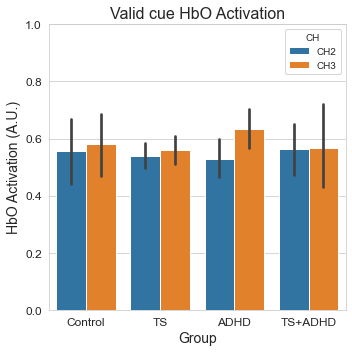

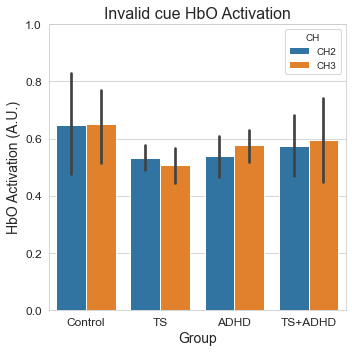

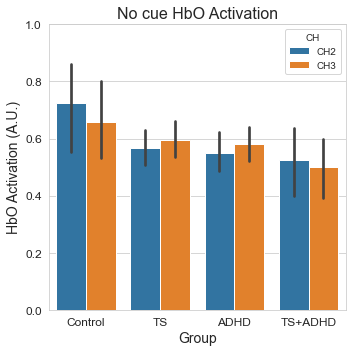

In [16]:
oxy=['Oxy']
cue = {'1': 'Valid cue', '3': 'Invalid cue', '5': 'No cue'}
for s in stage:
    for o in oxy:
        sns.set_style('whitegrid')
        fig, ax = plt.subplots(figsize=(5, 5))
        sns.barplot( data=df_act_all, x='group', y='stage'+str(s)+'_'+str(o)+'_activation',hue='CH', order=['control', 'TS', 'ADHD', 'TS+ADHD'])
        # sns.barplot(ax=ax[1], data=df_act_all, x='group', y='stage'+str(s)+'_'+str(o)+'_activation',hue='CH', order=['control', 'TS', 'ADHD', 'TS+ADHD'])
        # plt.suptitle('case' + str(i))
        # ax[0].set_ylim([0, 1.5])
        # ax[1].set_ylim([0, 1.5])
        plt.title(cue[str(s)] + ' HbO Activation', fontsize=16)
        plt.xlabel('Group', fontsize=14)
        plt.ylabel('HbO Activation (A.U.)', fontsize=14)
        plt.xticks([0, 1, 2, 3], ['Control', 'TS', 'ADHD', 'TS+ADHD'], fontsize=12)
        plt.yticks(fontsize=12)
        plt.ylim([0, 1])
        plt.tight_layout()
        plt.show()